In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('UrbanSound8K.csv')

In [4]:
data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


# visualization 

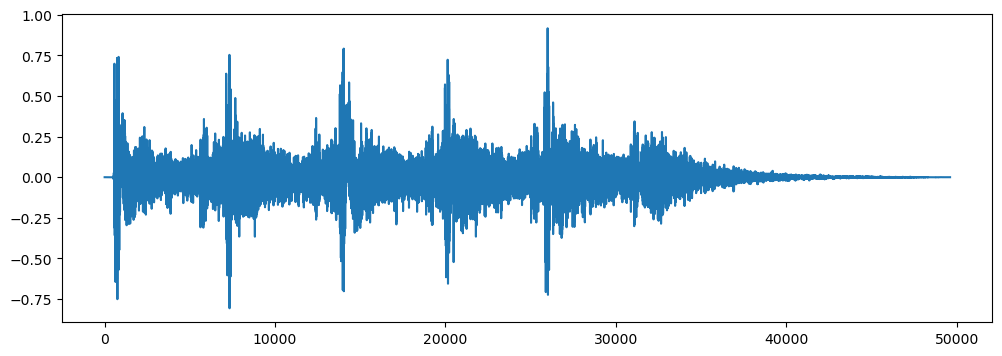

In [3]:
import matplotlib.pyplot as plt
import librosa

audio = '7061-6-0-0.wav'

l_data,l_audiorate=librosa.load(audio)

plt.figure(figsize=(12, 4))
plt.plot(l_data)

# Preprocessing

In [6]:
features = []
label = []

def preprocess(feature):
    l_data,l_srate = librosa.load(feature)
    mfccs = librosa.feature.mfcc(y=l_data, sr=l_srate, n_mfcc=25)
    mfccs_features = np.mean(mfccs.T,axis=0)
    return mfccs_features

for j in range (len(data['class'].value_counts())):
    for i in range (len(data)):
        feature = ('UrbanSound8K/audio/fold'+str(data['fold'][i])+'/'+str(data['slice_file_name'][i]))
        Audio_row = preprocess(feature)
        features.append(Audio_row)
        label.append(data['class'][i])

C:\Users\tsriv\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
C:\Users\tsriv\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\tsriv\anaconda3\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [7]:
features = pd.DataFrame(features)
label = pd.DataFrame(label)

In [8]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
y_label = onehot_encoder.fit_transform(label)
y_label = pd.DataFrame(y_label)

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,y_label,test_size=0.3,random_state=0)

# Neural Network

## Adam Optimizers

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model1=Sequential()

model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(128, input_shape=(25,), activation='relu'))
model1.add(Dropout(0.25))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.25))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(32, activation = 'relu'))
model1.add(Dropout(0.25))

model1.add(Dense(10, activation = 'softmax'))

adam_opt = tf.keras.optimizers.experimental.Adam()

model1.compile(loss ='binary_crossentropy', optimizer=adam_opt, metrics =['acc'])
history = model1.fit(X_train, y_train, validation_split = 0.4, epochs = 5, verbose = 1)

Epoch 1/5
1147/1147 [==============================] - 5s 3ms/step - loss: 0.2906 - acc: 0.4021 - val_loss: 0.1667 - val_acc: 0.6835
Epoch 2/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.2010 - acc: 0.5799 - val_loss: 0.1333 - val_acc: 0.7586
Epoch 3/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1780 - acc: 0.6419 - val_loss: 0.1141 - val_acc: 0.7801
Epoch 4/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1672 - acc: 0.6627 - val_loss: 0.1032 - val_acc: 0.8117
Epoch 5/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1579 - acc: 0.6856 - val_loss: 0.0949 - val_acc: 0.8276


In [11]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

819/819 [==============================] - 1s 1ms/step - loss: 0.0957 - acc: 0.8268
Test loss: 0.09568347036838531
Test accuracy: 0.826805591583252


## Neural Network with different optimizer

In [12]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model2=Sequential()

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(128, input_shape=(25,), activation='relu'))
model2.add(Dropout(0.25))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.25))

model2.add(Dense(10, activation = 'softmax'))

adamax_opt = tf.keras.optimizers.experimental.Adamax(learning_rate=0.002)

model2.compile(loss ='binary_crossentropy', optimizer=adamax_opt, metrics =['acc'])
history1 = model2.fit(X_train, y_train, validation_split = 0.4, epochs = 5, verbose = 1)

Epoch 1/5
1147/1147 [==============================] - 4s 3ms/step - loss: 0.2895 - acc: 0.3738 - val_loss: 0.1845 - val_acc: 0.6286
Epoch 2/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.2159 - acc: 0.5377 - val_loss: 0.1530 - val_acc: 0.7070
Epoch 3/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1962 - acc: 0.5896 - val_loss: 0.1348 - val_acc: 0.7551
Epoch 4/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1835 - acc: 0.6220 - val_loss: 0.1235 - val_acc: 0.7760
Epoch 5/5
1147/1147 [==============================] - 3s 2ms/step - loss: 0.1734 - acc: 0.6478 - val_loss: 0.1130 - val_acc: 0.7960


In [13]:
score1 = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

819/819 [==============================] - 1s 1ms/step - loss: 0.1136 - acc: 0.7960
Test loss: 0.09568347036838531
Test accuracy: 0.826805591583252


## Learning Curve comparing both model

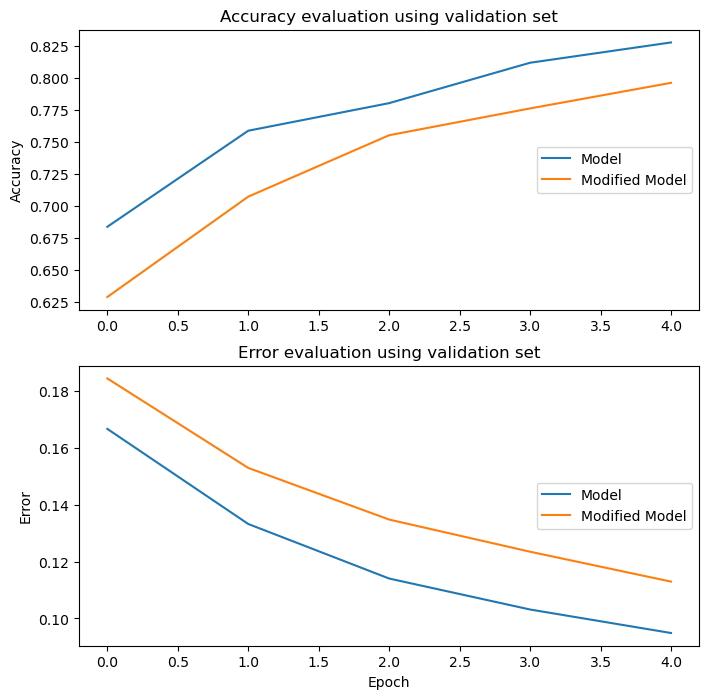

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
# create accuracy sublpot
plt.plot(history.history["val_acc"], label="Model")
plt.plot(history1.history["val_acc"], label="Modified Model")
plt.ylabel("Accuracy")
plt.legend(loc="center right")
plt.title("Accuracy evaluation using validation set")

# create error sublpot
plt.subplot(2,1,2)
plt.plot(history.history["val_loss"], label="Model")
plt.plot(history1.history["val_loss"], label="Modified Model")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend(loc="center right")
plt.title("Error evaluation using validation set")
plt.show()